##Unsupervised Learning

In [1]:
import pandas as pd

data = pd.read_csv('/content/Student_performance_data _ (1) (1).csv')
print(data.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [3]:
data.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


#Encoding Data Kategorikal dan Normalisasi Data

In [4]:
from sklearn.preprocessing import StandardScaler

# Fitur relevan untuk clustering (kecuali StudentID dan GradeClass)
features = data.drop(columns=['StudentID', 'GradeClass'])

# Melakukan One-Hot Encoding untuk variabel kategorikal (Gender, Ethnicity, ParentalEducation, ParentalSupport)
features_encoded = pd.get_dummies(features, columns=['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport'])

# Normalisasi data numerik agar berada pada skala yang sama
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)


GradeClass tidak digunakan karena algoritma ini tidak bergantung pada label atau kategori target saat melakukan pengelompokkan data.

#Menggunakan Elbow Method untuk Menentukan Jumlah Klaster yang Optimal

Jumlah klaster 1: Inertia = 59800.00000000004
Jumlah klaster 2: Inertia = 55910.36383567032
Jumlah klaster 3: Inertia = 53015.197010721444
Jumlah klaster 4: Inertia = 50717.63925191775
Jumlah klaster 5: Inertia = 49318.905810642165
Jumlah klaster 6: Inertia = 47915.894746872335
Jumlah klaster 7: Inertia = 45282.48453855619
Jumlah klaster 8: Inertia = 45021.57998518377
Jumlah klaster 9: Inertia = 44365.4722940631
Jumlah klaster 10: Inertia = 42974.29712104677


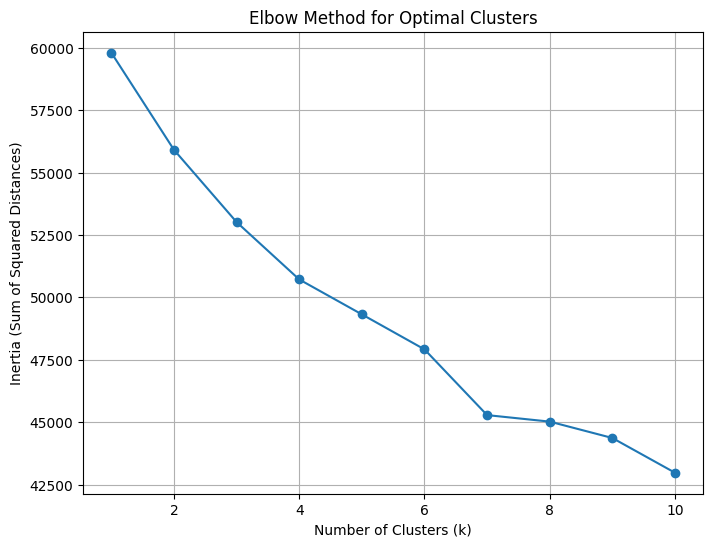

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Inisialisasi list untuk menyimpan inertia
inertia = []

# Uji clustering untuk berbagai jumlah klaster (k = 1 hingga 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Menampilkan inertia per jumlah klaster
for k, i in enumerate(inertia, 1):
    print(f"Jumlah klaster {k}: Inertia = {i}")

# Plot grafik Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

Berdasarkan data yang didapatkan, terlihat bahwa penurunan inertia mulai melambat setelah 4 klaster. Inertia dari 4 klaster (50,718) berkurang lebih lambat dibandingkan dengan penurunan antara klaster 3 dan 4.

#Menerapkan K-means Clustering dengan Jumlah Klaster yang Optimal

In [6]:
# Menerapkan K-means clustering dengan 4 klaster
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Menampilkan hasil clustering dengan beberapa fitur penting
clustered_data = data[['StudentID', 'Cluster', 'GPA', 'StudyTimeWeekly', 'Absences', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']]
print(clustered_data.head())

   StudentID  Cluster       GPA  StudyTimeWeekly  Absences  ParentalSupport  \
0       1001        1  2.929196        19.833723         7                2   
1       1002        2  3.042915        15.408756         0                1   
2       1003        2  0.112602         4.210570        26                2   
3       1004        1  2.054218        10.028829        14                3   
4       1005        1  1.288061         4.672495        17                3   

   Extracurricular  Sports  Music  Volunteering  
0                0       0      1             0  
1                0       0      0             0  
2                0       0      0             0  
3                1       0      0             0  
4                0       0      0             0  


In [7]:
# Menampilkan hasil clustering menggunakan DataFrame standar
print(clustered_data)

      StudentID  Cluster       GPA  StudyTimeWeekly  Absences  \
0          1001        1  2.929196        19.833723         7   
1          1002        2  3.042915        15.408756         0   
2          1003        2  0.112602         4.210570        26   
3          1004        1  2.054218        10.028829        14   
4          1005        1  1.288061         4.672495        17   
...         ...      ...       ...              ...       ...   
2387       3388        1  3.455509        10.680555         2   
2388       3389        2  3.279150         7.583217         4   
2389       3390        1  1.142333         6.805500        20   
2390       3391        0  1.803297        12.416653        17   
2391       3392        1  2.140014        17.819907        13   

      ParentalSupport  Extracurricular  Sports  Music  Volunteering  
0                   2                0       0      1             0  
1                   1                0       0      0             0  
2        

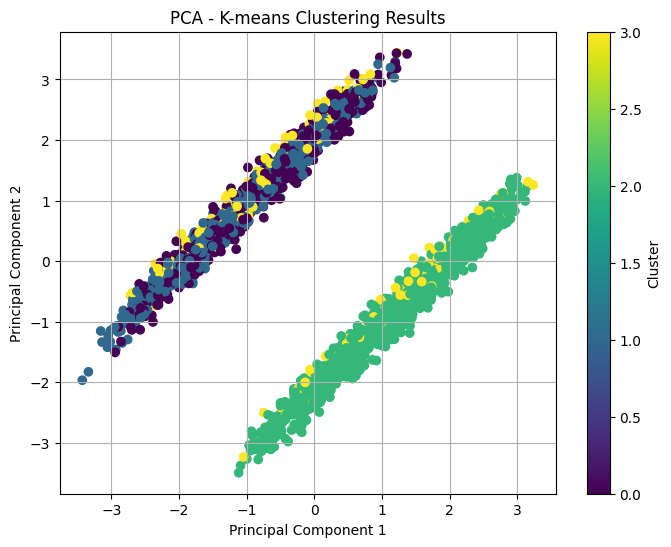

In [11]:
from sklearn.decomposition import PCA

# Reduksi dimensi data menjadi 2 dimensi untuk visualisasi
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_scaled)

# Visualisasi klaster dalam 2 dimensi
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('PCA - K-means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Penafsiran Klaster Berdasarkan Visualisasi PCA:
**Cluster 0 (Ungu):**

**Ciri:** Siswa dengan nilai principal component 1 (PC1) dan principal component 2 (PC2) rendah.

**Interpretasi:** Siswa dalam klaster ini cenderung memiliki kombinasi karakteristik yang lebih rendah dalam kedua komponen utama, yang mungkin mencerminkan faktor-faktor seperti lebih banyak ketidakhadiran, kurangnya waktu belajar, atau kurangnya dukungan orang tua atau aktivitas ekstrakurikuler.

**Cluster 1 (Hijau):**

**Ciri:** Siswa dengan nilai PC1 tinggi dan PC2 rendah.

**Interpretasi:** Klaster ini terdiri dari siswa yang memiliki nilai PC1 yang lebih tinggi, yang bisa mencerminkan faktor-faktor seperti lebih banyak waktu belajar atau dukungan orang tua yang lebih tinggi. Namun, mereka mungkin masih mengalami beberapa tantangan pada PC2, yang dapat mencakup kurangnya keterlibatan dalam kegiatan ekstrakurikuler atau lebih banyak ketidakhadiran.

**Cluster 2 (Kuning):**

**Ciri:** Siswa dengan nilai PC1 dan PC2 tinggi.

**Interpretasi:** Siswa di klaster ini menunjukkan kombinasi positif dari kedua komponen utama. Mereka mungkin memiliki waktu belajar yang lebih tinggi, absensi yang lebih rendah, serta dukungan orang tua dan keterlibatan dalam kegiatan ekstrakurikuler yang lebih baik. Secara keseluruhan, mereka memiliki profil akademik dan sosial yang lebih kuat, yang cenderung tercermin dalam nilai GPA yang lebih tinggi.

**Cluster 3 (Biru):**

**Ciri:** Siswa dengan nilai PC1 rendah dan PC2 tinggi.

**Interpretasi:** Klaster ini berisi siswa yang mungkin mengalami tantangan dalam waktu belajar (rendahnya nilai PC1), tetapi memiliki nilai tinggi dalam PC2, yang bisa menunjukkan keterlibatan aktif dalam kegiatan ekstrakurikuler, seperti olahraga atau musik. Walaupun mungkin kurang optimal dalam aspek akademik, siswa di klaster ini mungkin mengimbangi dengan kegiatan sosial dan ekstrakurikuler yang kuat.

Pengelompokan dengan Statistik deskriptif per cluster

In [ ]:
# Statistik deskriptif per cluster
cluster_stats = data.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'StudyTimeWeekly': ['mean', 'std'],
    'Absences': ['mean', 'std'],
    'GPA': ['mean', 'std']
}).reset_index()

# Mepilkan statistik deskriptif per cluster
print("Statistik deskriptif per cluster:")
print(cluster_stats)


Statistik deskriptif per cluster:
  Cluster        Age           StudyTimeWeekly             Absences            \
                mean       std            mean       std       mean       std   
0       0  16.490760  1.097798        9.858944  5.695998  14.462012  8.535215   
1       1  16.557724  1.118180        9.652841  5.830958  14.891057  8.432497   
2       2  16.431648  1.138082        9.687929  5.535621  14.454120  8.527081   
3       3  16.351351  1.114679       10.315737  5.618275  14.166667  8.145407   

        GPA            
       mean       std  
0  1.919259  0.931306  
1  1.869748  0.908898  
2  1.912579  0.917053  
3  1.947696  0.890072  


1. **Klaster 0:**
Usia Rata-rata (Age): 16.49 tahun, dengan standar deviasi 1.10, menunjukkan bahwa siswa dalam klaster ini sebagian besar berusia sekitar 16 hingga 17 tahun, dengan sedikit variasi.
Waktu Belajar Mingguan (StudyTimeWeekly): Rata-rata 9.86 jam, dengan standar deviasi 5.70, menunjukkan bahwa siswa di klaster ini menghabiskan waktu yang cukup banyak untuk belajar, namun ada variasi yang besar dalam waktu belajar di antara mereka.
Absensi (Absences): Rata-rata absensi 14.46, dengan deviasi standar 8.54, yang menunjukkan bahwa klaster ini memiliki tingkat absensi yang cukup tinggi, dengan variasi yang signifikan di antara siswa.
GPA (Grade Point Average): Rata-rata GPA adalah 1.92, yang menunjukkan bahwa rata-rata GPA siswa di klaster ini relatif rendah. Standar deviasi 0.93 menunjukkan variasi yang cukup besar di antara siswa dalam hal performa akademik.
2. **Klaster 1:**
Usia Rata-rata (Age): 16.56 tahun, sedikit lebih tinggi dari klaster 0, tetapi variasinya masih serupa.
Waktu Belajar Mingguan (StudyTimeWeekly): Rata-rata 9.65 jam, yang sedikit lebih rendah dibandingkan dengan klaster 0, tetapi variasinya hampir sama (standar deviasi 5.83).
Absensi (Absences): Rata-rata absensi 14.89, sedikit lebih tinggi dibandingkan dengan klaster 0, namun variasinya hampir sama.
GPA (Grade Point Average): Rata-rata GPA adalah 1.87, yang lebih rendah dari klaster 3, tetapi hampir sama dengan klaster 0 dan 2. Variasi di antara siswa masih cukup besar, dengan standar deviasi 0.91.
3. **Klaster 2:**
Usia Rata-rata (Age): 16.43 tahun, hampir sama dengan klaster 0, menunjukkan bahwa siswa di klaster ini juga sebagian besar berusia 16-17 tahun.
Waktu Belajar Mingguan (StudyTimeWeekly): Rata-rata waktu belajar adalah 9.69 jam, sedikit lebih rendah dari klaster 0, dengan variasi yang hampir sama.
Absensi (Absences): Rata-rata absensi 14.45, yang sangat mirip dengan klaster 0. Klaster ini juga menunjukkan tingkat absensi yang cukup tinggi.
GPA (Grade Point Average): Rata-rata GPA adalah 1.91, yang hampir sama dengan klaster 0. Variasi dalam nilai GPA siswa di klaster ini juga cukup besar (standar deviasi 0.92).
4. **Klaster 3:**
Usia Rata-rata (Age): 16.35 tahun, sedikit lebih rendah dibandingkan dengan klaster-klaster lainnya, meskipun perbedaannya tidak terlalu signifikan.
Waktu Belajar Mingguan (StudyTimeWeekly): Rata-rata waktu belajar adalah 10.32 jam, yang sedikit lebih tinggi dibandingkan dengan klaster-klaster lainnya, dengan standar deviasi 5.62.
Absensi (Absences): Rata-rata absensi 14.17, yang sedikit lebih rendah dibandingkan dengan klaster lainnya.
GPA (Grade Point Average): Rata-rata GPA adalah 1.95, yang sedikit lebih tinggi dibandingkan dengan klaster-klaster lainnya, meskipun masih menunjukkan bahwa siswa di klaster ini memiliki nilai akademik yang rendah secara keseluruhan.
Kesimpulan Umum:
Tingkat Absensi: Secara keseluruhan, tingkat absensi di semua klaster relatif tinggi, dengan rata-rata sekitar 14 absensi per siswa. Ini mungkin menunjukkan adanya masalah yang perlu ditangani dalam hal kehadiran siswa.

Waktu Belajar: Siswa di semua klaster menghabiskan waktu belajar yang cukup banyak (sekitar 9-10 jam per minggu), namun terdapat variasi yang besar, yang berarti tidak semua siswa dengan waktu belajar yang sama memiliki hasil yang sama.

GPA: Secara keseluruhan, rata-rata GPA di semua klaster berada di bawah 2.0, yang berarti performa akademik siswa di klaster-klaster ini cenderung rendah. Ini menunjukkan bahwa meskipun siswa menghabiskan banyak waktu untuk belajar, performa akademik mereka mungkin dipengaruhi oleh faktor-faktor lain seperti absensi, dukungan orang tua, atau keterlibatan dalam kegiatan ekstrakurikuler.

Rekomendasi:
Peningkatan Kehadiran: Untuk meningkatkan performa akademik siswa, mungkin perlu ada upaya untuk mengurangi tingkat absensi, karena absensi yang tinggi dapat berdampak negatif terhadap GPA.

Pendekatan yang Lebih Personal: Mengingat variasi yang besar dalam waktu belajar dan GPA, mungkin ada baiknya untuk mempertimbangkan pendekatan yang lebih personal dalam membantu siswa, seperti memberikan bimbingan tambahan atau mendukung kegiatan ekstrakurikuler yang dapat membantu meningkatkan motivasi belajar